In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### NumPy: linear regression

y = 1.9453x + -2.6254 (r2 = 0.9769)


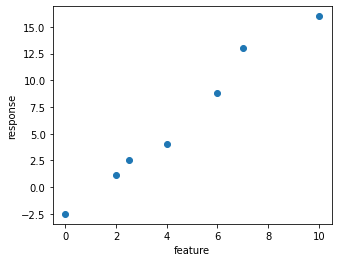

In [6]:
### Data
x_values = np.array([0,2,2.5,4,6,7,10])
y_values = np.array([-2.5,1.1,2.5,4,8.8,13,16])

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot()
ax.scatter(x_values,y_values)
ax.set_xlabel("feature")
ax.set_ylabel("response")

### Solution
avg_x = np.mean(x_values)
avg_y = np.mean(y_values)
s_xy = np.sum((x_values - avg_x)*(y_values - avg_y))
s_x2 = np.sum((x_values - avg_x)**2)

m = s_xy/s_x2
n = avg_y - m*avg_x

r_xy_num = np.mean(x_values*y_values) - avg_x*avg_y
r_xy_denom_sqrd = (np.mean(x_values**2) - avg_x**2)*(np.mean(y_values**2) - avg_y**2)
r_xy = r_xy_num/np.sqrt(r_xy_denom_sqrd)

print("y = {:.4f}x + {:.4f} (r2 = {:.4f})".format(m,n,r_xy**2))

In [7]:
### Bonus
def linear_regression(x,y):
    avg_x = np.mean(x)
    avg_y = np.mean(y)
    s_xy = np.sum((x - avg_x)*(y - avg_y))
    s_x2 = np.sum((x - avg_x)**2)

    m = s_xy/s_x2
    n = avg_y - m*avg_x

    r_xy_num = np.mean(x*y) - avg_x*avg_y
    r_xy_denom_sqrd = (np.mean(x**2) - avg_x**2)*(np.mean(y**2) - avg_y**2)
    r_xy = r_xy_num/np.sqrt(r_xy_denom_sqrd)
    return m,n,r_xy**2

### Pandas: grouping
Instead of by type, group the wines by their quality, and explore their mean content in alcohol and citric acid, as well as their total acidity.


In [14]:
wines = pd.read_csv("datasets/wine-quality-white-and-red.csv")
grp = wines.groupby("quality")
grp[["alcohol","citric acid","fixed acidity"]].mean()

,alcohol,citric acid,fixed acidity
quality,,,
3,10.215000,0.281000,7.853333
4,10.180093,0.272315,7.288889
5,9.837783,0.307722,7.326801
6,10.587553,0.323583,7.177257
7,11.386006,0.334764,7.128962
8,11.678756,0.332539,6.835233
9,12.180000,0.386000,7.420000


### Pandas: pivot table
Get a similar table grouping by type and quality, but now targeting the residual sugar content as the value, and getting the count of values instead of the average.

In [17]:
tab = pd.pivot_table(data=wines,index="type",columns="quality",values="residual sugar",aggfunc="count")
display(tab)

quality,3,4,5,6,7,8,9
type,,,,,,,
red,10.0,53.0,681.0,638.0,199.0,18.0,NaN
white,20.0,163.0,1457.0,2198.0,880.0,175.0,5.0


### Pandas: cross table
Get a similar table, considering the gender breakdown instead of the geographical breakdown, for Nobel prizes in Chemistry (*question 3*)

In [19]:
nobel = pd.read_csv("datasets/nobel-complete.csv")
sel_nobel = nobel.loc[:,["awardYear","gender","birth_continent","category"]].dropna()
def get_decade(year):
    # Takes a given year and obtains the decade it belongs to
    return int(year/10)*10
sel_nobel.loc[:,"awardDecade"] = sel_nobel.loc[:,"awardYear"].apply(get_decade)

sel_chem = sel_nobel[sel_nobel.loc[:,"category"] == "Chemistry"]

tab2 = pd.crosstab(sel_chem.loc[:,"awardDecade"],sel_chem.loc[:,"gender"])
display(tab2)

gender,female,male
awardDecade,,
1900,0,9
1910,1,7
1920,0,10
1930,1,12
1940,0,9
1950,0,14
1960,1,14
1970,0,15
1980,0,21


### Pandas: pivot table with calculations
The previous calculations are biased, as the table has entries for every winner, but some of the prizes are shared, and the amount of money shall be also shared. 

A fair estimation of the money that was actually awarded would require to scale the award prize in every row by the *portion* it was shared. 

Calculate this and assign it to a new column in the DataFrame, then create the pivot table.

In [21]:
sel_nobel_money = nobel.loc[:,["awardYear","category","prizeAmount","portion"]]
sel_nobel_money.loc[:,"awardDecade"] = sel_nobel_money.loc[:,"awardYear"].apply(get_decade)

sel_nobel_money.loc[:,"actualMoney"] = sel_nobel_money.loc[:,"prizeAmount"] * sel_nobel_money.loc[:,"portion"]
tab3 = pd.pivot_table(data=sel_nobel_money,index="awardDecade",columns="category",values="actualMoney",
                     aggfunc="sum")
display(tab3)

category,Chemistry,Economic Sciences,Literature,Peace,Physics,Physiology or Medicine
awardDecade,,,,,,
1900,1269867.0,NaN,1269867.0,1269867.0,1269867.0,1269867.0
1910,999205.0,NaN,1112850.0,831834.0,1266155.0,844911.0
1920,1184416.0,NaN,1301135.0,912542.0,1301135.0,1061397.0
1930,1462643.0,NaN,1473058.0,1312400.0,1297161.0,1632975.0
1940,950567.0,NaN,826876.0,667103.0,950567.0,950567.0
1950,1894194.0,NaN,1894194.0,1503857.0,1894194.0,1894194.0
1960,2898440.0,375000.0,2898440.0,2278440.0,2898440.0,2898440.0
1970,5926000.0,5926000.0,5926000.0,5446000.0,5926000.0,5926000.0
1980,17655000.0,17655000.0,17655000.0,17655000.0,17655000.0,17655000.0
